In [4]:
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

import numpy as np
import pandas as pd  
import gensim#For topic modeling
import lucem_illud

#access lda model
import logging
import pyLDAvis.gensim
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

In [1]:
%store -r nowlda10

In [6]:
%store -r now_df

In [7]:
dictionary = gensim.corpora.Dictionary(now_df['reduced_tokens'])

In [8]:
corpus = [dictionary.doc2bow(text) for text in now_df['reduced_tokens']]

In [9]:
gensim.corpora.MmCorpus.serialize('data/now.mm', corpus)
nowmm = gensim.corpora.MmCorpus('data/now.mm')

In [10]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(nowlda10, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.043880  0.041185       1        1  15.905955
2      0.154768  0.036954       2        1  14.663639
4     -0.061601  0.110823       3        1  13.288710
8      0.125124 -0.058139       4        1  13.270284
5     -0.004575 -0.006192       5        1  10.147409
0      0.051432  0.050580       6        1   9.147039
1     -0.108133  0.031019       7        1   9.049940
7     -0.072062 -0.078847       8        1   8.548754
3     -0.041073 -0.127384       9        1   5.978270, topic_info=          Term          Freq          Total Category  logprob  loglift
393      woman  99068.000000   99068.000000  Default  30.0000  30.0000
609      south  53036.000000   53036.000000  Default  29.0000  29.0000
561     africa  37486.000000   37486.000000  Default  28.0000  28.0000
372     school  50285.000000   50285.000000  Default  27.0000  27.0000
610        tax  50547.000000   50547.000000  Default  26.0000  26.0000
..         ...           ...            ...      ...      ...      ...
289     policy   3717.949691   57818.774011   Topic9  -5.2340   0.0729
123       work   4204.205591  106874.052026   Topic9  -5.1111  -0.4185
358  political   3540.932606   53238.234338   Topic9  -5.2828   0.1067
277     leader   3210.022914   30748.042689   Topic9  -5.3809   0.5575
81      public   3377.023245   55644.529091   Topic9  -5.3301   0.0150

[485 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
503       1  0.027508    abuse
503       2  0.014428    abuse
503       3  0.359758    abuse
503       4  0.005663    abuse
503       5  0.017664    abuse
...     ...       ...      ...
663       9  0.000090  zealand
656       5  0.003457     zuma
656       7  0.000216     zuma
656       8  0.000216     zuma
656       9  0.995969     zuma

[3031 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 5, 9, 6, 1, 2, 8, 4])

In [11]:
for top in nowlda10.print_topics():
    print(top)

(0, '0.043*"school" + 0.031*"child" + 0.029*"education" + 0.028*"student" + 0.023*"university" + 0.022*"say" + 0.017*"health" + 0.014*"work" + 0.012*"high" + 0.011*"community"')
(1, '0.032*"say" + 0.030*"trump" + 0.027*"president" + 0.014*"state" + 0.012*"american" + 0.012*"candidate" + 0.011*"campaign" + 0.011*"democratic" + 0.010*"america" + 0.009*"white"')
(2, '0.028*"tax" + 0.024*"income" + 0.018*"pay" + 0.016*"rate" + 0.014*"high" + 0.014*"cent" + 0.014*"increase" + 0.013*"low" + 0.013*"wage" + 0.012*"say"')
(3, '0.067*"south" + 0.051*"africa" + 0.028*"african" + 0.026*"black" + 0.020*"anc" + 0.018*"land" + 0.015*"white" + 0.014*"say" + 0.012*"president" + 0.012*"africans"')
(4, '0.057*"woman" + 0.027*"say" + 0.019*"man" + 0.018*"work" + 0.015*"gender" + 0.011*"know" + 0.010*"think" + 0.010*"day" + 0.010*"come" + 0.009*"want"')
(5, '0.028*"say" + 0.027*"party" + 0.016*"minister" + 0.014*"election" + 0.013*"mr" + 0.011*"vote" + 0.011*"leader" + 0.010*"labour" + 0.010*"trade" + 0.00

In [12]:
lda_corpus = nowlda10[nowmm]

In [13]:
from itertools import chain

In [14]:
scores = list(chain(*[[score for topic_id,score in topic] for topic in [doc for doc in lda_corpus]]))
threshold = sum(scores)/len(scores)
print(threshold)

0.11111111111757689


In [15]:
ldaDF = pandas.DataFrame({
        'id' : now_df['id'],
        'year' : now_df['year'],
        'topics' : [nowlda10[dictionary.doc2bow(l)] for l in now_df['reduced_tokens']]
    })

In [16]:
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(nowlda10.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(nowlda10.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

In [17]:
#randomly sample 2 news from each year
df = ldaDF.groupby('year').apply(lambda x: x.sample(2, random_state = 123)).reset_index(drop=True)
df

,id,year,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8
0,1563224,10,"[(0, 0.00048390552), (1, 0.08976823), (2, 0.34...",0.000484,0.089768,0.349322,0.000454,0.007990,0.468793,0.000467,0.009568,0.073153
1,1451590,10,"[(0, 0.024115477), (1, 0.0013016815), (2, 0.00...",0.024115,0.001302,0.001236,0.001255,0.001218,0.416782,0.540815,0.011948,0.001329
2,4111108,11,"[(0, 0.0012803696), (1, 0.0013304731), (2, 0.0...",0.001280,0.001330,0.001378,0.001306,0.447940,0.001395,0.503246,0.001267,0.040857
3,4244553,11,"[(0, 0.67467237), (1, 0.02847851), (2, 0.03063...",0.674672,0.028479,0.030633,0.083159,0.005521,0.000838,0.161087,0.014820,0.000792
4,1237839,12,"[(0, 0.00079781696), (1, 0.0007584019), (2, 0....",0.000798,0.000758,0.422820,0.005541,0.211616,0.000783,0.000819,0.180468,0.176397
5,830162,12,"[(0, 0.12551847), (1, 0.18240622), (2, 0.01616...",0.125518,0.182406,0.016168,0.000671,0.000827,0.131568,0.424625,0.000718,0.117498
6,561358,13,"[(0, 0.0052957134), (1, 0.08868644), (2, 0.453...",0.005296,0.088686,0.453622,0.005187,0.005324,0.250926,0.005246,0.180299,0.005413
7,2027451,13,"[(0, 0.0020676774), (1, 0.18587151), (2, 0.157...",0.002068,0.185872,0.157676,0.044604,0.001924,0.001954,0.309685,0.277237,0.018980
8,4615147,14,"[(0, 0.0014785618), (1, 0.007289573), (2, 0.00...",0.001479,0.007290,0.001393,0.001529,0.001310,0.001419,0.143244,0.576048,0.266287
9,2307789,14,"[(0, 0.23619431), (1, 0.0031291773), (2, 0.001...",0.236194,0.003129,0.001267,0.001325,0.220951,0.144558,0.001336,0.389932,0.001309


In [19]:
ldaDFV = df[['topic_%d' %x for x in range(9)]]
ldaDFVisN = df[['year']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8
0,0.000484,0.089768,0.349322,0.000454,0.007990,0.468793,0.000467,0.009568,0.073153
1,0.024115,0.001302,0.001236,0.001255,0.001218,0.416782,0.540815,0.011948,0.001329
2,0.001280,0.001330,0.001378,0.001306,0.447940,0.001395,0.503246,0.001267,0.040857
3,0.674672,0.028479,0.030633,0.083159,0.005521,0.000838,0.161087,0.014820,0.000792
4,0.000798,0.000758,0.422820,0.005541,0.211616,0.000783,0.000819,0.180468,0.176397
5,0.125518,0.182406,0.016168,0.000671,0.000827,0.131568,0.424625,0.000718,0.117498
6,0.005296,0.088686,0.453622,0.005187,0.005324,0.250926,0.005246,0.180299,0.005413
7,0.002068,0.185872,0.157676,0.044604,0.001924,0.001954,0.309685,0.277237,0.018980
8,0.001479,0.007290,0.001393,0.001529,0.001310,0.001419,0.143244,0.576048,0.266287
9,0.236194,0.003129,0.001267,0.001325,0.220951,0.144558,0.001336,0.389932,0.001309


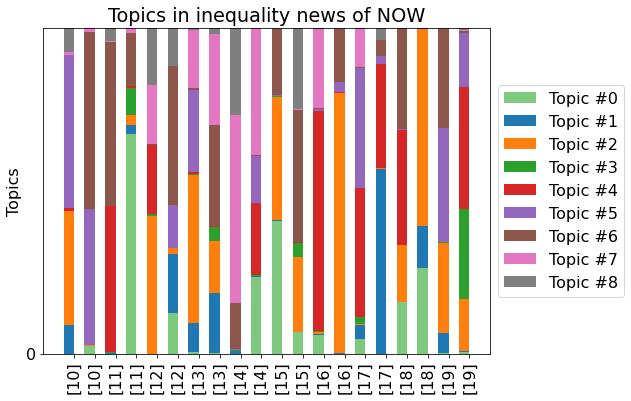

In [20]:
N = 20
ind = np.arange(N)
K = nowlda10.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)
plt.rc('font', size=16)
plt.figure(figsize = (8, 6))

for k in range(K):
    color = plt.cm.Accent(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in inequality news of NOW')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

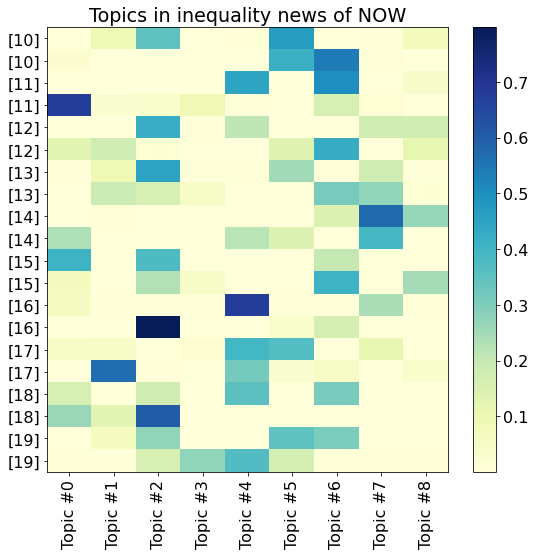

In [21]:
plt.figure(figsize = (8,8))
plt.pcolor(ldaDFVis, norm=None, cmap='YlGnBu')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);
plt.title('Topics in inequality news of NOW')
# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='YlGnBu')
plt.tight_layout()  # fixes margins
plt.show()

<Figure size 432x288 with 0 Axes>

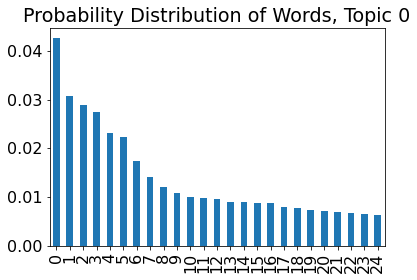

In [28]:
topic0 = pandas.DataFrame(nowlda10.show_topic(0, topn=25))
plt.figure()
topic0.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 0')
plt.show()

<Figure size 432x288 with 0 Axes>

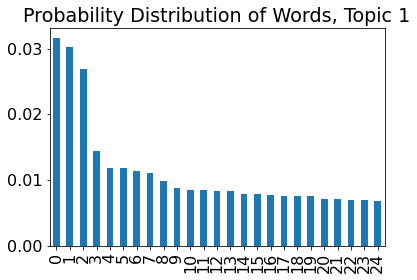

In [29]:
topic1 = pandas.DataFrame(nowlda10.show_topic(1, topn=25))
plt.figure()
topic1.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 1')
plt.show()

<Figure size 432x288 with 0 Axes>

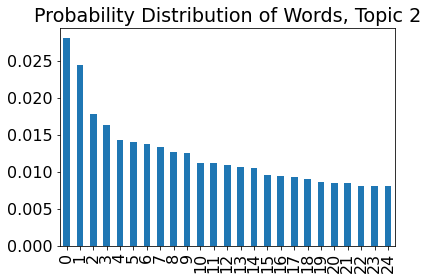

In [30]:
topic2 = pandas.DataFrame(nowlda10.show_topic(2, topn=25))
plt.figure()
topic2.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 2')
plt.show()

<Figure size 432x288 with 0 Axes>

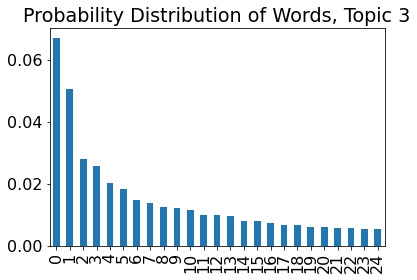

In [31]:
topic3 = pandas.DataFrame(nowlda10.show_topic(3, topn=25))
plt.figure()
topic3.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 3')
plt.show()

<Figure size 432x288 with 0 Axes>

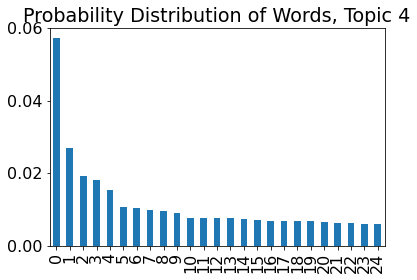

In [32]:
topic4 = pandas.DataFrame(nowlda10.show_topic(4, topn=25))
plt.figure()
topic4.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 4')
plt.show()

<Figure size 432x288 with 0 Axes>

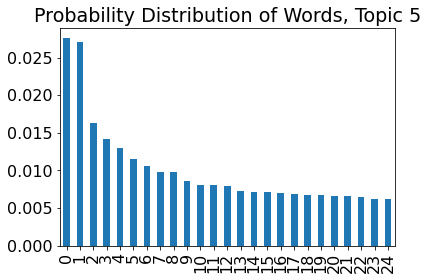

In [33]:
topic5 = pandas.DataFrame(nowlda10.show_topic(5, topn=25))
plt.figure()
topic5.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 5')
plt.show()

<Figure size 432x288 with 0 Axes>

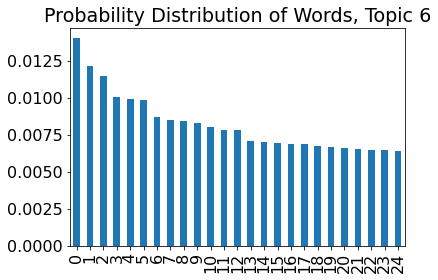

In [40]:
topic6 = pandas.DataFrame(nowlda10.show_topic(6, topn=25))
plt.figure()
topic6.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 6')
plt.show()

<Figure size 432x288 with 0 Axes>

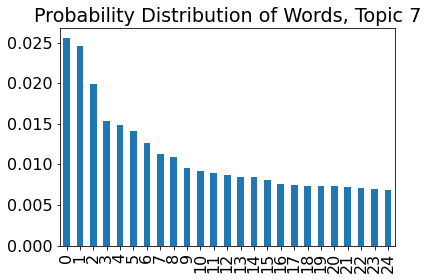

In [41]:
topic7 = pandas.DataFrame(nowlda10.show_topic(7, topn=25))
plt.figure()
topic7.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 7')
plt.show()

<Figure size 432x288 with 0 Axes>

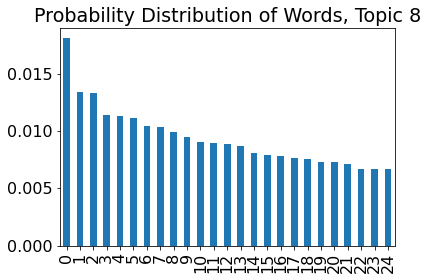

In [42]:
topic8 = pandas.DataFrame(nowlda10.show_topic(8, topn=25))
plt.figure()
topic8.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 8')
plt.show()